# Venn Diagram of DEGs
looking for DEGs that are shared/unique among the comparisons

## 0. load libraries

In [2]:
library(ggvenn)
library(tidyverse)

## 1. data processing

### 1a. read CSVs

In [7]:
##### comparisons vs. control
# warm vs. control
w.c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.warm_v_control.csv')

# both vs. control
b.c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.both_v_control.csv')

# hyp vs. control
h.c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.hyp_v_control.csv')

##### other comparisons
# hyp vs. both
h.b <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.hyp_v_both.csv')

# warm vs. both
w.b <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.warm_v_both.csv')

# warm vs. hyp
w.h <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/p1.warm_v_hyp.csv')

### 1b. pull out DEGs
DEGs = lfc > |0.5| & adjusted-p <= 0.05

In [10]:
# create function to pull out only DEGs
find_deg <- function(df) {
    new_df <- df %>%
mutate(
    direction = case_when(
        log2FoldChange > 0.5 & padj <= 0.05 ~ "Up",
        log2FoldChange < 0.5 & padj <= 0.05 ~ "Down",
        TRUE ~ "NS"
        ) 
    ) %>%
        filter(direction != 'NS')

    return(new_df)
}

In [14]:
# comparisons with control
w.c_deg <- find_deg(w.c)
b.c_deg <- find_deg(b.c)
h.c_deg <- find_deg(h.c)

# other comparisons
h.b_deg <- find_deg(h.b)
w.b_deg <- find_deg(w.b)
w.h_deg <- find_deg(w.h)

# check it worked
unique(w.c_deg$direction)
head(w.c_deg)

[1] "Up"   "Down"

,X,baseMean,log2FoldChange,lfcSE,pvalue,padj,direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,LOC111130870,2284.04141,0.6048057,0.3311764,3.071487e-05,1.511412e-02,Up
2,LOC111129171,35.65903,-21.0979119,4.0239489,3.540950e-08,4.848484e-05,Down
3,LOC111121183,21.46042,19.0512042,3.0024718,8.926857e-11,2.811335e-07,Up
4,LOC111106303,35.27859,3.3346320,1.1826733,1.254522e-05,7.597818e-03,Up
5,LOC111122541,163.56702,1.6972850,1.0090617,7.292738e-05,2.702002e-02,Up
6,LOC111130453,100.84269,2.3712218,0.6373756,3.969454e-06,2.907209e-03,Up


## 2. venn diagram

#### comparisons against control

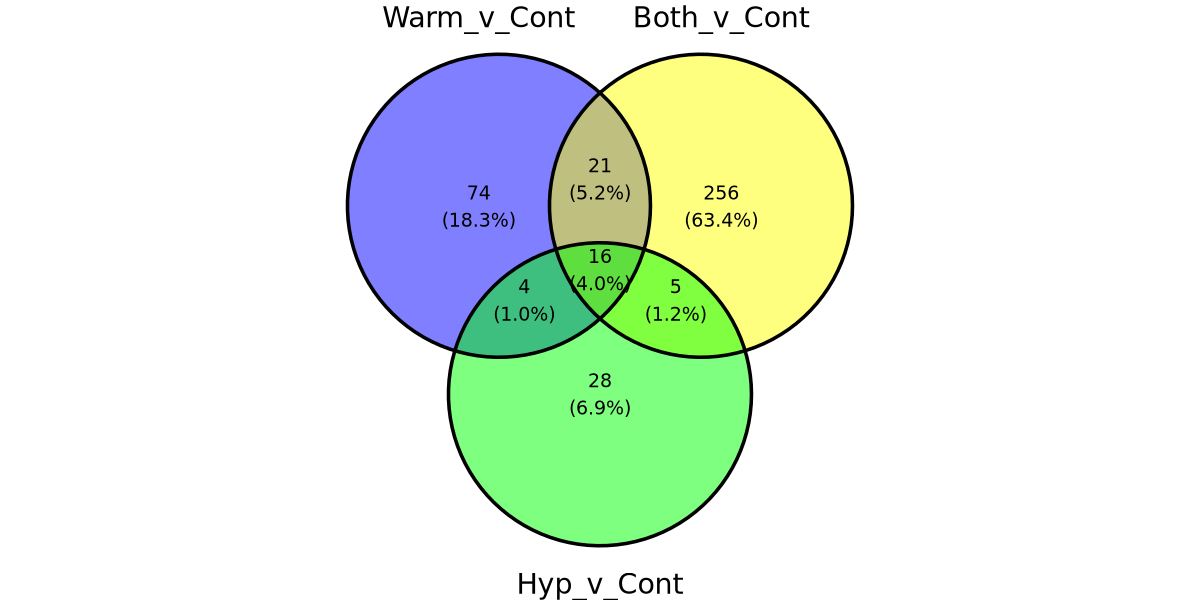

In [26]:
options(repr.plot.width=10, repr.plot.height=5)

# make list of dfs
x = list(Warm_v_Cont = w.c_deg$X,
         Both_v_Cont = b.c_deg$X,
         Hyp_v_Cont = h.c_deg$X)

ggvenn(x)

#### comparisons with warm

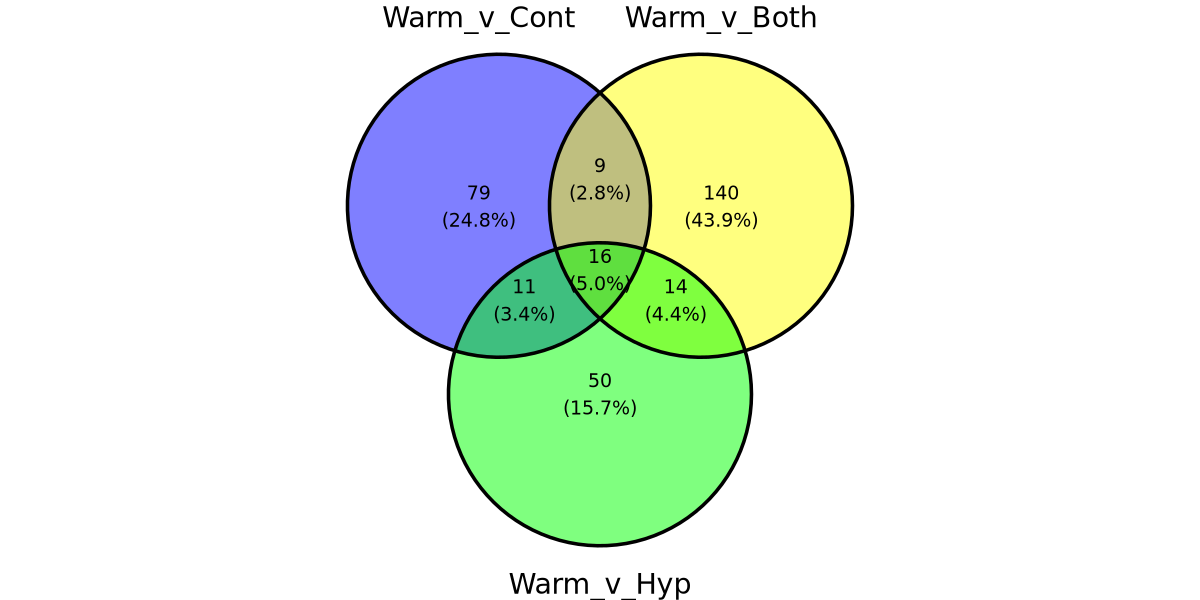

In [27]:
# make list of dfs
y = list(Warm_v_Cont = w.c_deg$X,
         Warm_v_Both = w.b_deg$X,
         Warm_v_Hyp = w.h_deg$X)

ggvenn(y)

#### comparisons with hypoxic

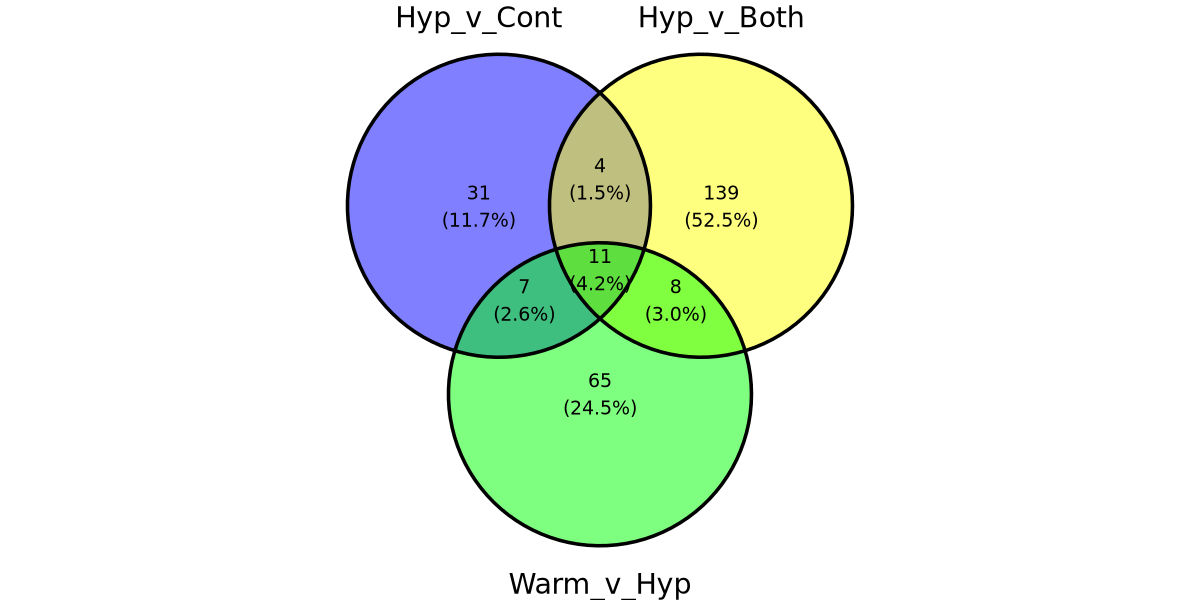

In [28]:
# make list of dfs
z = list(Hyp_v_Cont = h.c_deg$X,
         Hyp_v_Both = h.b_deg$X,
         Warm_v_Hyp = w.h_deg$X)

ggvenn(z)

#### comparisons with both

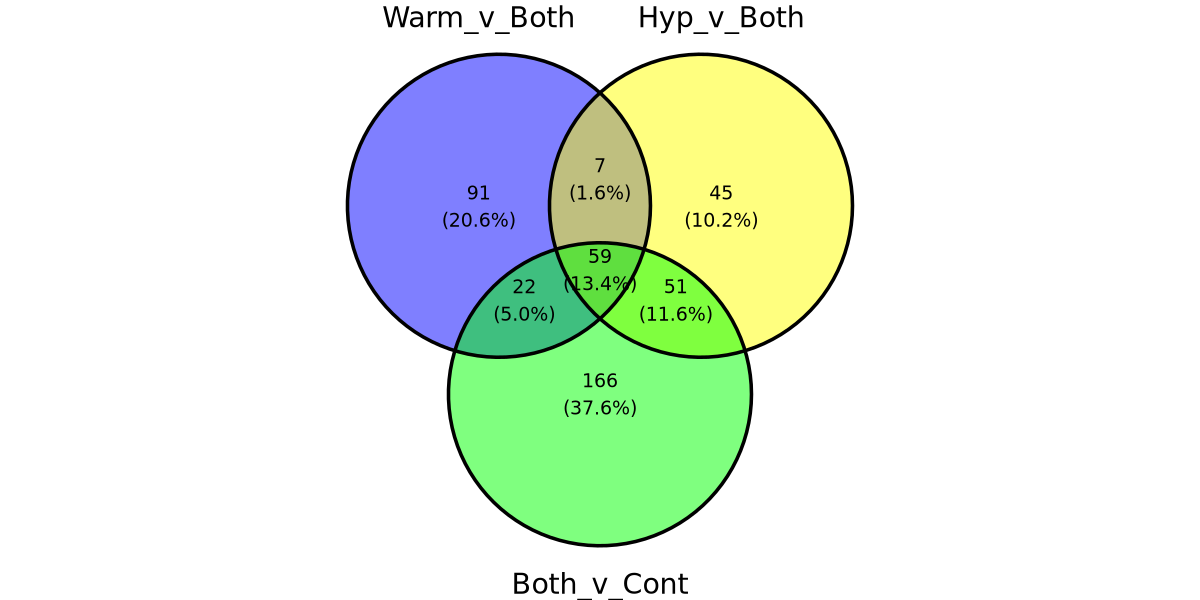

In [30]:
# make list of dfs
w = list(Warm_v_Both = w.b_deg$X,
         Hyp_v_Both = h.b_deg$X,
         Both_v_Cont = b.c_deg$X)

ggvenn(w)